## The mission of USDA's Economic Research Service is to anticipate trends and emerging issues in agriculture and food and to conduct research in order to inform and enhance public and private decision making.  The following project takes several unprocessed public data sets from https://www.ers.usda.gov and utilizes them to look at trends concerning health and wellness(in particular the increasing rate of diabetes). According to the data, the nation's median adult obesity rate has gone up from 28% in 2008 to 31% in 2013 and the nation's median adult diabetes rate has gone up from 9% in 2008 to 11% in 2013.  This data project aims to shed light on some possible correlations and trends that may contribute to the etiology of those rate increases.

In [52]:
# import packages to be used for data analysis
import pandas as pd
import numpy as np
from warnings import simplefilter
simplefilter(action='ignore')

In [53]:
# return dataframe from the passed in excel file
df = pd.ExcelFile('DataDownload-2.xls')

In [54]:
# since the excel file contains several sheets, read in the sheets needed for this project
access = pd.read_excel(df,'ACCESS')
assistance = pd.read_excel(df,'ASSISTANCE')
restaurants = pd.read_excel(df,'RESTAURANTS')
local = pd.read_excel(df,'LOCAL')
prices = pd.read_excel(df,'PRICES_TAXES')
health = pd.read_excel(df,'HEALTH')
economics = pd.read_excel(df,'SOCIOECONOMIC')

In [55]:
# create 7 different dataframes from the USDA economic research data including only pertinent columns(features)
access = access[['PCT_LACCESS_HHNV15']]
assistance = assistance[['PCT_SNAP12']]
restaurants = restaurants[['PC_FFRSALES12','PC_FSRSALES12']]
local = local[['DIRSALES_FARMS12']]
prices = prices[['SODA_PRICE10']]
health = health[['PCT_DIABETES_ADULTS13','PCT_OBESE_ADULTS13','RECFACPTH14']]
economics = economics[['FIPS','MEDHHINC15','POVRATE15','PCT_NHWHITE10','PCT_NHBLACK10','PCT_NHNA10']]

### Features defined from 7 different USDA economic research center datasets:
###### FIPS = federal information processing standard given to each county
###### PCT_SNAP12 = SNAP participants (% pop), 2012
###### PCT_LACCESS_HHNV15 = Households, no car & low access to store (%), 2015
######  PC_FFRSALES12= Expenditures per capita, fast food, 2012
######  PC_FSRSALES12= Expenditures per capita, full service restaurants, 2012
###### DIRSALES_FARMS12= Farms with direct sales, 2012
###### SODA_PRICE10 = PRICE OF SODAS IN 2010
###### PCT_DIABETES_ADULTS13 = ADULT DIABETES RATE IN 2013
###### PCT_OBESE_ADULTS13 = ADULT OBESITY RATE IN 2013
###### RECFACPTH14 = FITNESS FACILITIES PER 1000 PPL IN 2014
###### PCT_NHWHITE10 = % White, 2010
###### PCT_NHBLACK10 = % Black, 2010
###### PCT_NHNA10 = % American Indian or Alaska Native, 2010
###### MEDHHINC15 = MEDIAN HOUSEHOLD INCOME IN 2015
###### POVRATE15= POVERTY RATE IN 2015

In [56]:
# insure number of rows equivalent before concatenation
print(access.shape)
print(assistance.shape)
print(restaurants.shape)
print(local.shape)
print(prices.shape)
print(health.shape)
print(economics.shape)

(3143, 1)
(3143, 1)
(3143, 2)
(3143, 1)
(3143, 1)
(3143, 3)
(3143, 6)


In [57]:
# concatenate the 7 different datsets
ers1 = pd.concat([access,assistance, restaurants, local, prices, health, economics], axis = 1)
print(ers1.shape)
ers1.head()

(3143, 15)


,PCT_LACCESS_HHNV15,PCT_SNAP12,PC_FFRSALES12,PC_FSRSALES12,DIRSALES_FARMS12,SODA_PRICE10,PCT_DIABETES_ADULTS13,PCT_OBESE_ADULTS13,RECFACPTH14,FIPS,MEDHHINC15,POVRATE15,PCT_NHWHITE10,PCT_NHBLACK10,PCT_NHNA10
0,3.351332,18.824675,674.80272,512.280987,51.0,0.972216,13.0,34.1,0.090261,1001,56580.0,12.7,77.246156,17.582599,0.397647
1,1.905114,18.824675,674.80272,512.280987,103.0,1.001391,10.4,27.4,0.124931,1003,52387.0,12.9,83.504787,9.308425,0.628755
2,4.329378,18.824675,674.80272,512.280987,13.0,0.992584,18.4,44.4,0.000000,1005,31433.0,32.0,46.753105,46.691190,0.218524
3,2.821427,18.824675,674.80272,512.280987,13.0,0.972216,14.8,40.3,0.044433,1007,40767.0,22.2,75.020729,21.924504,0.279293
4,3.336414,18.824675,674.80272,512.280987,88.0,0.972216,14.1,34.6,0.051976,1009,50487.0,14.7,88.887338,1.263040,0.497191


In [58]:
# take a look at the number of missing values
ers1.isnull().sum()

PCT_LACCESS_HHNV15        3
PCT_SNAP12                0
PC_FFRSALES12             0
PC_FSRSALES12             0
DIRSALES_FARMS12         63
SODA_PRICE10             34
PCT_DIABETES_ADULTS13     1
PCT_OBESE_ADULTS13        1
RECFACPTH14               0
FIPS                      0
MEDHHINC15                4
POVRATE15                 4
PCT_NHWHITE10             0
PCT_NHBLACK10             0
PCT_NHNA10                0
dtype: int64

In [59]:
# replace columns with no direct farm sales with zero
ers1['DIRSALES_FARMS12'] = ers1['DIRSALES_FARMS12'].fillna(0)

In [60]:
# since remaining amount is less than 2%, drop the remaining rows without values
ers1.dropna(inplace=True)
ers1.isnull().sum()

PCT_LACCESS_HHNV15       0
PCT_SNAP12               0
PC_FFRSALES12            0
PC_FSRSALES12            0
DIRSALES_FARMS12         0
SODA_PRICE10             0
PCT_DIABETES_ADULTS13    0
PCT_OBESE_ADULTS13       0
RECFACPTH14              0
FIPS                     0
MEDHHINC15               0
POVRATE15                0
PCT_NHWHITE10            0
PCT_NHBLACK10            0
PCT_NHNA10               0
dtype: int64

In [61]:
# insure that all values are numerical 
print(ers1.shape)
ers1.info()

(3105, 15)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3105 entries, 0 to 3142
Data columns (total 15 columns):
PCT_LACCESS_HHNV15       3105 non-null float64
PCT_SNAP12               3105 non-null float64
PC_FFRSALES12            3105 non-null float64
PC_FSRSALES12            3105 non-null float64
DIRSALES_FARMS12         3105 non-null float64
SODA_PRICE10             3105 non-null float64
PCT_DIABETES_ADULTS13    3105 non-null float64
PCT_OBESE_ADULTS13       3105 non-null float64
RECFACPTH14              3105 non-null float64
FIPS                     3105 non-null int64
MEDHHINC15               3105 non-null float64
POVRATE15                3105 non-null float64
PCT_NHWHITE10            3105 non-null float64
PCT_NHBLACK10            3105 non-null float64
PCT_NHNA10               3105 non-null float64
dtypes: float64(14), int64(1)
memory usage: 388.1 KB


In [62]:
# take a look at correlation of diabetes rate(dependent variable) on 13 other variables
ers1.corr()['PCT_DIABETES_ADULTS13'].sort_values(ascending=False)

PCT_DIABETES_ADULTS13    1.000000
PCT_OBESE_ADULTS13       0.701382
PCT_LACCESS_HHNV15       0.533778
POVRATE15                0.532202
PCT_SNAP12               0.529891
PCT_NHBLACK10            0.462222
PC_FFRSALES12            0.278185
PCT_NHNA10               0.094189
FIPS                    -0.071260
PCT_NHWHITE10           -0.129481
DIRSALES_FARMS12        -0.256559
RECFACPTH14             -0.300722
SODA_PRICE10            -0.305524
PC_FSRSALES12           -0.340781
MEDHHINC15              -0.571974
Name: PCT_DIABETES_ADULTS13, dtype: float64

In [63]:
# drop FIPS before viewing correlation heatmap
ers = ers1.drop(labels=['FIPS'], axis=1)

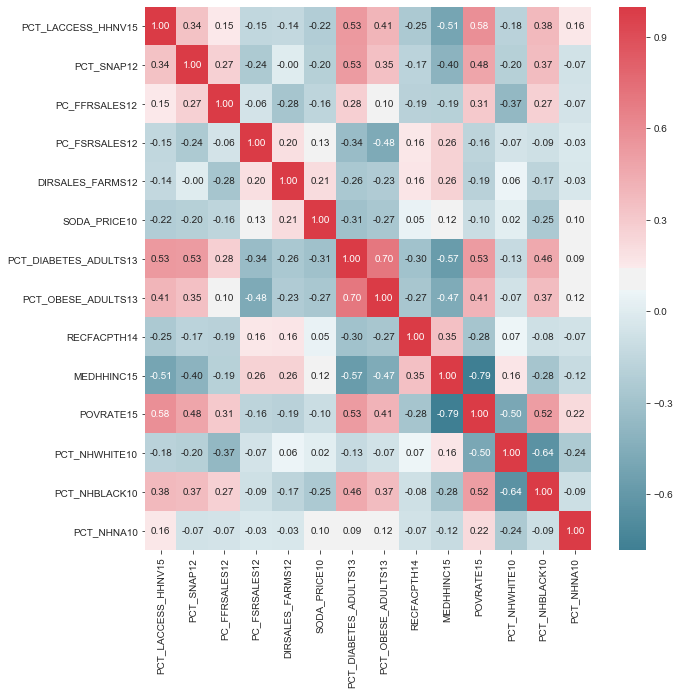

In [64]:
# create a correlation heatmap to see if there are trends between different features
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
corr_plot = ers.corr()
fig, ax = plt.subplots(figsize = (10,10))
colormap=sns.diverging_palette(220,10, as_cmap=True)
_ = sns.heatmap(corr_plot,cmap=colormap,annot=True,fmt=".2f", xticklabels=corr_plot.columns, yticklabels=corr_plot.columns)
plt.show()

### The features most correlated with diabetes are obesity, median household income, poverty rate, SNAP participants and households with no car and low access to the store.  Diabetes is also found to be correlated with increased fast food consumption.  There's an inverse relationship between diabetes and fitness facilities as well as an inverse relationship between diabetes and farm sales. Finally, there's an inverse correlation between diabetes and soda price.  

(array([  18.,  100.,  549., 1013.,  805.,  454.,  129.,   31.,    4.,
           2.]),
 array([ 3.3 ,  5.32,  7.34,  9.36, 11.38, 13.4 , 15.42, 17.44, 19.46,
        21.48, 23.5 ]),
 <a list of 10 Patch objects>)

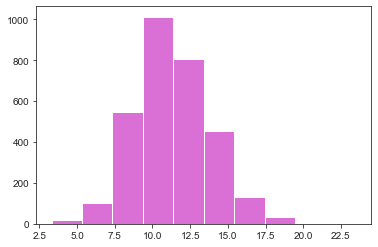

In [65]:
# look at the diabetes rate distribution on a histogram
plt.hist(ers['PCT_DIABETES_ADULTS13'], color= 'orchid')

In [66]:
# take a look at the diabetes rate stats
diabetes_mean = np.mean(ers[['PCT_DIABETES_ADULTS13']])
diabetes_median = np.median(ers[['PCT_DIABETES_ADULTS13']])
print('median diabetes rate is:', np.median(ers[['PCT_DIABETES_ADULTS13']]))
print('mean diabetes rate is:', np.mean(ers[['PCT_DIABETES_ADULTS13']]))
print('max diabetes rate is:', np.max(ers[['PCT_DIABETES_ADULTS13']]))
print('min diabetes rate is:', np.min(ers[['PCT_DIABETES_ADULTS13']]))

median diabetes rate is: 11.1
mean diabetes rate is: PCT_DIABETES_ADULTS13    11.28
dtype: float64
max diabetes rate is: PCT_DIABETES_ADULTS13    23.5
dtype: float64
min diabetes rate is: PCT_DIABETES_ADULTS13    3.3
dtype: float64


### The histogram above shows that the nation's average diabetes rate is 11% with a minimum county diabetes rate of 3% and the maximum county diabetes rate of 24%  The histogram also skews to the right showing a higher frequency of counties with above average diabetes rate than below average diabetes rate  with the max diabetes rate being more than 3 standard deviations above the mean!

(array([1.790e+02, 9.960e+02, 1.133e+03, 5.220e+02, 1.430e+02, 8.200e+01,
        2.800e+01, 1.700e+01, 4.000e+00, 1.000e+00]),
 array([ 22894. ,  33194.6,  43495.2,  53795.8,  64096.4,  74397. ,
         84697.6,  94998.2, 105298.8, 115599.4, 125900. ]),
 <a list of 10 Patch objects>)

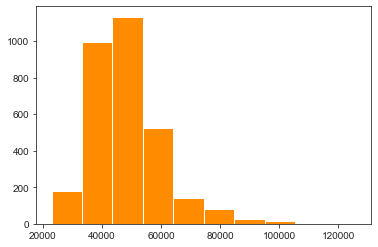

In [67]:
# look at the median household distribution on a histogram
plt.hist(ers['MEDHHINC15'], color='darkorange')

In [68]:
# take a look at the mean and median household income
print('mean household income is:', np.mean(ers[['MEDHHINC15']]))
print('median household income is:', np.median(ers[['MEDHHINC15']]))

mean household income is: MEDHHINC15    48432.512077
dtype: float64
median household income is: 46696.0


### The above plot and stats indicate the mean household income is 48,432 dollars, the median household income is 46,696 dollars and that the overall histogram is skewed to the left indicating that there are a greater percentage of counties below the median household income than are above the median household income

Text(0, 0.5, 'obesity_rate')

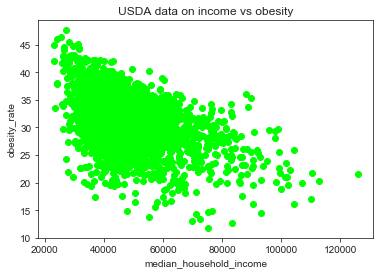

In [69]:
# create a plot of income vs obesity rate
fig, ax = plt.subplots()
ax.scatter(ers['MEDHHINC15'], ers['PCT_OBESE_ADULTS13'], color = 'lime')
ax.set_title('USDA data on income vs obesity')
ax.set_xlabel('median_household_income')
ax.set_ylabel('obesity_rate')

Text(0, 0.5, 'diabetes_rate')

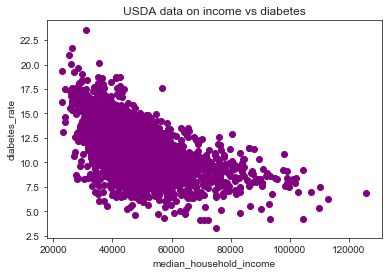

In [70]:
# create a plot of income vs diabetes rate 
fig, ax = plt.subplots()
ax.scatter(ers['MEDHHINC15'], ers['PCT_DIABETES_ADULTS13'], color= 'purple')
ax.set_title('USDA data on income vs diabetes')
ax.set_xlabel('median_household_income')
ax.set_ylabel('diabetes_rate')

### The above data visualizations shows that as the median household income goes up, the rate of obesity and diabetes decreases and that the lowest median household incomes are associated with the highest diabetes and obesity rates

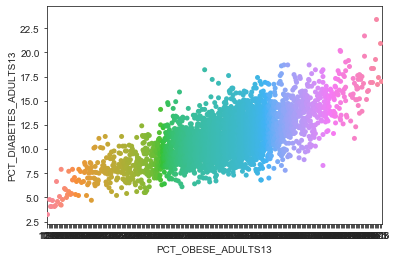

In [71]:
# look at the highest correlated feature, obesity rate, on a beeswarm plot
_ = sns.swarmplot(x='PCT_OBESE_ADULTS13', y='PCT_DIABETES_ADULTS13', data=ers)

## The beeswarm plot above shows a strong direct correlation  between obesity and diabetes.

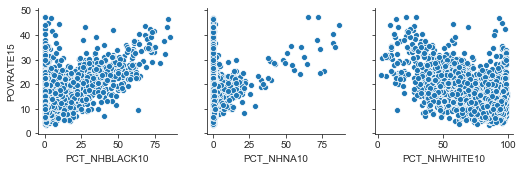

In [72]:
#take a look at poverty rate with different demograhics
sns.pairplot(ers, x_vars = ['PCT_NHBLACK10','PCT_NHNA10','PCT_NHWHITE10'], y_vars=['POVRATE15'])

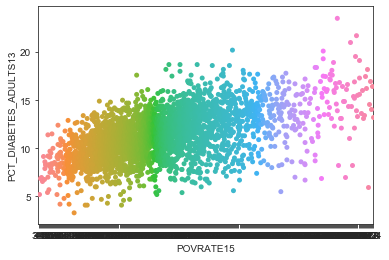

In [73]:
# look at feature povrate15 vs diabetes rate on on a beeswarm plot
_ = sns.swarmplot(x='POVRATE15',y = 'PCT_DIABETES_ADULTS13', data=ers)

### The scatterplot and beeswarm plot show the demographics with higher poverty rates and how poverty rate is highly correlated with diabetes

In [74]:
# take a look at the stats for the cost of soda in 2010
soda_cost = ers[['SODA_PRICE10']]
print('mean soda cost:', np.mean(soda_cost))

mean soda cost: SODA_PRICE10    0.991701
dtype: float64


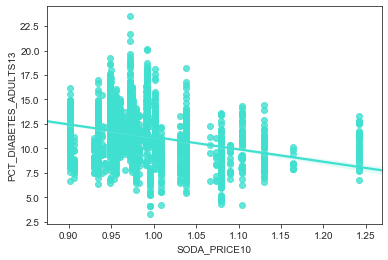

In [75]:
# take a look at the scatterplot of soda price and diabetes rate 
import seaborn as sns
sns.set_style('white')
sns.set_style('ticks')
sns.regplot(x='SODA_PRICE10', y= 'PCT_DIABETES_ADULTS13', color = 'turquoise', data = ers)

## The above scatterplot shows the average soda price is 0.99 cents but also shows that as the price of soda goes up, the rate of diabetes drops.  

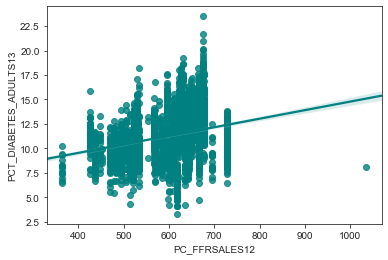

In [76]:
# take a look at the scatterplot of fast food sales vs diabetes rate 
sns.set_style('white')
sns.set_style('ticks')
sns.regplot(x='PC_FFRSALES12', y= 'PCT_DIABETES_ADULTS13', color = 'teal', data = ers)

## The above plot shows that as fast food consumption increases, diabetes rates also increase.  The above visualizations show that economic hardship as well as easy access to inexpensive high sugar foods such as soda increases the diabetes rate

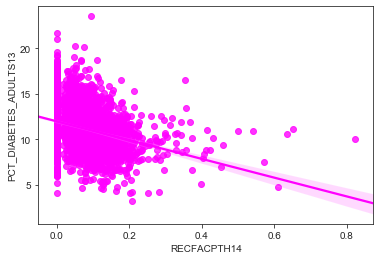

In [77]:
# take a look at the scatterplot of number of fitness facilites per 1000 ppl vs diabetes rate
sns.regplot(x = 'RECFACPTH14', y = 'PCT_DIABETES_ADULTS13', color = 'magenta',data =ers)

## The visualization above shows that as the number of fitness facilities per county increases, the rate of diabetes decreases

{'whiskers': [<matplotlib.lines.Line2D at 0x1a29d6b0f0>,
 'caps': [<matplotlib.lines.Line2D at 0x122c99f28>,
 'boxes': [<matplotlib.lines.Line2D at 0x122c99390>],
 'medians': [<matplotlib.lines.Line2D at 0x122ca3668>],
 'fliers': [<matplotlib.lines.Line2D at 0x122ca3d68>],
 'means': [<matplotlib.lines.Line2D at 0x122ca39e8>]}

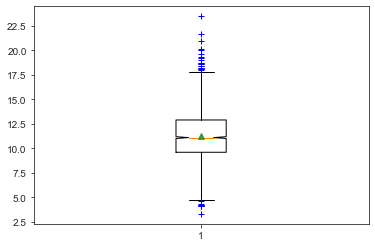

In [78]:
# take a look at median diabetes rate on a box and whisker plot.
plt.boxplot(ers['PCT_DIABETES_ADULTS13'],1, showmeans = True, sym = 'b+')

### The box whisker plot as well as the histogram above shows that the data for diabetes rate is spread out fairly symmetrically in that the mean is close to the median however it also shows there are more frequency of data points at a diabetes rate higher than the mean than there are data points lower than the mean.  

## Hypothesis Testing:
### null hypoth: diff of means between dataset diabetes rate mean and bootstrap diabetes rate mean = 0
### alt hypoth: diff of means between dataset diabetes rate mean and bootstrap diabetes rate mean!= 0¶ 

In [79]:
# compare the mean home price of the actual dataset with mean home price of the bootstrap sample
print("Mean diabetes rate is:", diabetes_mean)
diabetes_std = (np.std(ers['PCT_DIABETES_ADULTS13']))
print("Diabetes rate standard deviation is:", diabetes_std)
bs_sample = np.random.choice(ers['PCT_DIABETES_ADULTS13'], size = 2000)
bs_mean = np.mean(bs_sample)
bs_std = np.std(bs_sample)
print("Bootstrap mean and Bootstrap std dev is:", bs_mean,',',bs_std)

Mean diabetes rate is: PCT_DIABETES_ADULTS13    11.28
dtype: float64
Diabetes rate standard deviation is: 2.4584356729701287
Bootstrap mean and Bootstrap std dev is: 11.2495 , 2.4719222783089276


In [80]:
# calculate p value
from statsmodels.stats.weightstats import ztest
z, pval = ztest(ers['PCT_DIABETES_ADULTS13'],bs_sample, alternative='two-sided')
print('zscore is:', round(z,2))
print('pvalue is:', round(pval,2))

zscore is: 0.43
pvalue is: 0.67


### With the p value greater than .05 we can fail to reject the null hypothesis and thus the difference of means between the dataset diabetes mean and the bootstrap diabetes mean = 0

In [81]:
# assign the features being utilized to x_cols
x_cols = ['PCT_NHWHITE10','PCT_NHBLACK10','PCT_NHNA10','PCT_OBESE_ADULTS13','PCT_LACCESS_HHNV15','PCT_SNAP12','POVRATE15', 'PC_FFRSALES12','SODA_PRICE10','RECFACPTH14','PC_FSRSALES12','MEDHHINC15','DIRSALES_FARMS12']
X = ers[x_cols].as_matrix()
print(X.shape)
print(type(X))

(3105, 13)
<class 'numpy.ndarray'>


In [82]:
# assign the predictor(target) variable
y = ers['PCT_DIABETES_ADULTS13'].values
print(type(y))
print(y.shape)

<class 'numpy.ndarray'>
(3105,)


In [83]:
# Import regression modules and utilize ordinary least squares(OLS) to look at rsquared, AIC/BIC and pvalue
import statsmodels.api as sm
from statsmodels.formula.api import ols
m = ols('PCT_DIABETES_ADULTS13 ~ DIRSALES_FARMS12',ers).fit()
print(m.summary())

                              OLS Regression Results                             
Dep. Variable:     PCT_DIABETES_ADULTS13   R-squared:                       0.066
Model:                               OLS   Adj. R-squared:                  0.066
Method:                    Least Squares   F-statistic:                     218.6
Date:                   Sat, 13 Jun 2020   Prob (F-statistic):           7.34e-48
Time:                           22:01:38   Log-Likelihood:                -7093.1
No. Observations:                   3105   AIC:                         1.419e+04
Df Residuals:                       3103   BIC:                         1.420e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept 

In [84]:
# create a linear regression model for features chosen
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8,random_state=42)
linreg.fit(X_train,y_train)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2484, 13) (621, 13) (2484,) (621,)


In [85]:
# calculate the coefficients
linreg.coef_

array([ 3.18642426e-02,  4.86017286e-02,  5.43382043e-02,  2.15814706e-01,
        1.22472210e-01,  1.38420185e-01, -2.43240686e-02,  5.05354714e-03,
       -1.72875599e+00, -1.11816602e+00,  3.32143860e-04, -3.99119348e-05,
       -6.07128821e-04])

In [86]:
# create table in order to compare coefficients
X1 = ers[x_cols]
coeff_df = pd.DataFrame((linreg.coef_ *100000), X1.columns, columns=['Coefficients'])  
coeff_df

,Coefficients
PCT_NHWHITE10,3186.424261
PCT_NHBLACK10,4860.172857
PCT_NHNA10,5433.820433
PCT_OBESE_ADULTS13,21581.470628
PCT_LACCESS_HHNV15,12247.221037
PCT_SNAP12,13842.018529
POVRATE15,-2432.406861
PC_FFRSALES12,505.354714
SODA_PRICE10,-172875.598576
RECFACPTH14,-111816.601997


In [87]:
# create prediction model that closely predicts y_test and take the mean squared error
y_pred = linreg.predict(X_test)
np.mean((y_pred - y_test) **2)

1.8948809432116789

In [88]:
# take a look at R^2 score for linear regression model
from sklearn.metrics import mean_squared_error
mse = np.mean((y_pred - y_test) **2)
mse_r = mse ** (1/2)
print("root mean square error is:", mse_r)
print("mean square error is:", mean_squared_error(y_test, y_pred))
r2_score = linreg. score(X,y)
print("r2 score is:", r2_score)

root mean square error is: 1.3765467457415599
mean square error is: 1.8948809432116789
r2 score is: 0.696850139838648


In [89]:
# compare R^2 score above with cross-validation score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
scores = cross_val_score(linreg, X, y, cv=2)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.69018026 0.64450815]
Average cross-validation score: 0.67


In [110]:
# utilize random forest regressor model to compare accuracy
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
ran = RandomForestRegressor(n_estimators=100)
sel = SelectFromModel(ran, threshold=0.007)
sel.fit(X1,y)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                                max_depth=None,
                                                max_features='auto',
                                                max_leaf_nodes=None,
                                                min_impurity_decrease=0.0,
                                                min_impurity_split=None,
                                                min_samples_leaf=1,
                                                min_samples_split=2,
                                                min_weight_fraction_leaf=0.0,
                                                n_estimators=100, n_jobs=None,
                                                oob_score=False,
                                                random_state=None, verbose=0,
                                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, th

In [111]:
# determine best features before applying algorithm
sel.get_support(indices=True)
selected_feat=X1.columns[(sel.get_support())]
len(selected_feat)

13

In [112]:
# print best features
print(selected_feat)

Index(['PCT_NHWHITE10', 'PCT_NHBLACK10', 'PCT_NHNA10', 'PCT_OBESE_ADULTS13',
       'PCT_LACCESS_HHNV15', 'PCT_SNAP12', 'POVRATE15', 'PC_FFRSALES12',
       'SODA_PRICE10', 'RECFACPTH14', 'PC_FSRSALES12', 'MEDHHINC15',
       'DIRSALES_FARMS12'],
      dtype='object')


In [93]:
# utilize gridsearch search cv to tune hyperparameters
from sklearn.model_selection import GridSearchCV
param_dist =  {'n_estimators':[50,100,150], 'random_state':[1,10,42],'min_samples_leaf':[1,3,5],'min_samples_split':[2,4,6]}
ran_cv = GridSearchCV(ran, param_dist, cv=3)
ran_cv.fit(X,y)
print("Tunes Random Forest Regressor HyperParameters:{}".format(ran_cv.best_params_))

Tunes Random Forest Regressor HyperParameters:{'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 50, 'random_state': 10}


In [102]:
# print accuracy on random forest regressor 
rfr = RandomForestRegressor(min_samples_leaf = 5, min_samples_split= 2, n_estimators= 50, random_state= 10)
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, random_state=11)
rfr.fit(X_train,y_train)
print("accuracy on the training subset:{:.3f}".format(rfr.score(X_train,y_train)))
print("accuracy on the test subset:{:.3f}".format(rfr.score(X_test,y_test)))

accuracy on the training subset:0.889
accuracy on the test subset:0.765


In [95]:
# import gradient boosting regressor to compare different models
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

In [96]:
# take a look at hyperparameters utilized in gradient boosting regressor
print('Hyperparameters currently in use:\n')
pprint(gbr.get_params())

Hyperparameters currently in use:

{'alpha': 0.9,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [97]:
# utilize gridsearch search cv to choose best hyperparameters
from sklearn.model_selection import GridSearchCV
param_dist =  {'n_estimators':[10,50,100,200], 'random_state':[1,10,42], 'min_samples_leaf':[1,2,3], 'min_samples_split':[2,3,4],'learning_rate':[.1,.2,.3]}
gbr_cv = GridSearchCV(gbr, param_dist, cv=3)
gbr_cv.fit(X,y)
print("Tunes Gradient Boosting HyperParameters:{}".format(gbr_cv.best_params_))

Tunes Gradient Boosting HyperParameters:{'learning_rate': 0.2, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 50, 'random_state': 10}


In [103]:
# test accuracy of model with the Gradient Boosting Regressor Algorithm
grad = GradientBoostingRegressor(learning_rate=0.2, min_samples_leaf=1, min_samples_split=4, n_estimators= 50, random_state= 10)
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=19)
grad.fit(X_train,y_train)
print("accuracy on the training subset:{:.3f}".format(grad.score(X_train,y_train)))
print("accuracy on the test subset:{:.3f}".format(grad.score(X_test,y_test)))

accuracy on the training subset:0.814
accuracy on the test subset:0.755


In [99]:
# import xgboost model to compare to previous models
import xgboost as xgb
xbr = xgb.XGBRegressor(objective ='reg:squarederror')
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
xbr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [100]:
# print accuracy score on both training and test set 
print("accuracy on the training subset:{:.3f}".format(xbr.score(X_train,y_train)))
print("accuracy on the test subset:{:.3f}".format(xbr.score(X_test,y_test)))

accuracy on the training subset:0.813
accuracy on the test subset:0.741


In [ ]:
# tune hyperparameters to see if accuracy can be improved further by generalization
param_dist =  {'n_estimators':[100,200], 'random_state':[1,10,19],'min_child_weight':[1,5,10], 'learning_rate':[.1,.2,.3],'max_depth':[3,4,5],'reg_lambda':[1,5,100]}
xbr_cv = GridSearchCV(xbr, param_dist, cv=3)
xbr_cv.fit(X,y)
print("Tunes XGB HyperParameters:{}".format(xbr_cv.best_params_))   

In [106]:
# compare on test subset with tuned hyperparameters
xbr = xgb.XGBRegressor(objective ='reg:squarederror',learning_rate =0.1, max_depth =4, min_child_weight=10, n_estimators=250, random_state=1,reg_lambda=100 )
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=11)
xbr.fit(X_train,y_train)
print("accuracy on the training subset:{:.3f}".format(xbr.score(X_train,y_train)))
print("accuracy on the test subset:{:.3f}".format(xbr.score(X_test,y_test)))

accuracy on the training subset:0.850
accuracy on the test subset:0.785


## Comparing the different machine learning models reveals 70% with linear regression, 81% with gradient boosting regressor, 89% with random forest regressor and  85% with XGBoost.   The fact that random forest regressor performed better than gradient boosting regressor indicates that the bagging method improved training accuracy more than the boosting method. Although, the random forest regressor had the highest accuracy on the training subset, the XGBoost had the best accuracy on the test subset of 79%.  XGBoost uses the boosting method which might explain why its accuracy on the training subset is lower than the random forest regressor but the reason for it having the highest accuracy on the test subset is most likely because it improves model generalization and overcomes issues of over-fitting. Therefore, XGBoost is the model that predicted diabetes rate per county the most accurately.  The features that are the strongest predictors for diabetes rate are median household income, fastfood restaurant sales and obesity rate.  This is valuable information in our nation's fight against diabetes.  